<ipython-input-1-d87a620a9000>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Proyecto Final', palette=colors, ax=ax)
<ipython-input-1-d87a620a9000>:48: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(data=data, x='Proyecto Final', palette=colors, ax=ax)
<ipython-input-1-d87a620a9000>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='¿Consideras que el tiempo y los recursos asignados fueron adecuados?', palette=colors, ax=ax)
<ipython-input-1-d87a620a9000>:57: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(data=data, x='¿Consideras 

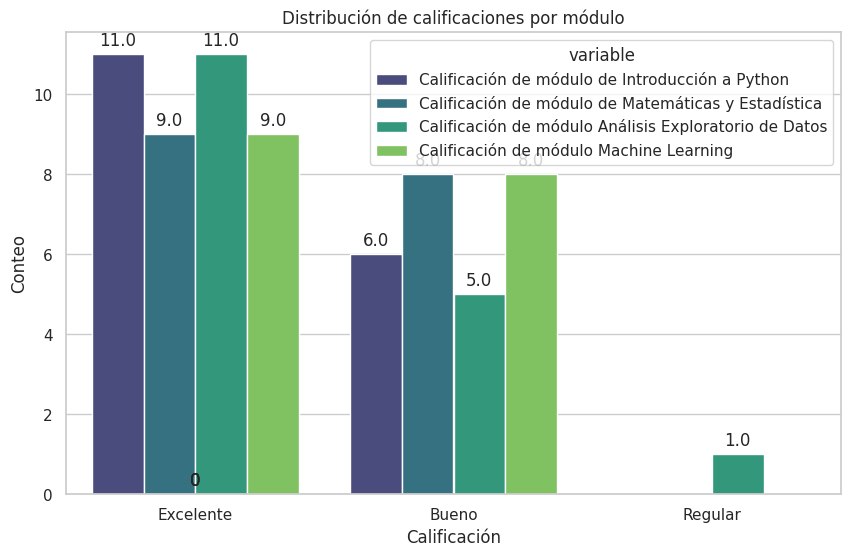

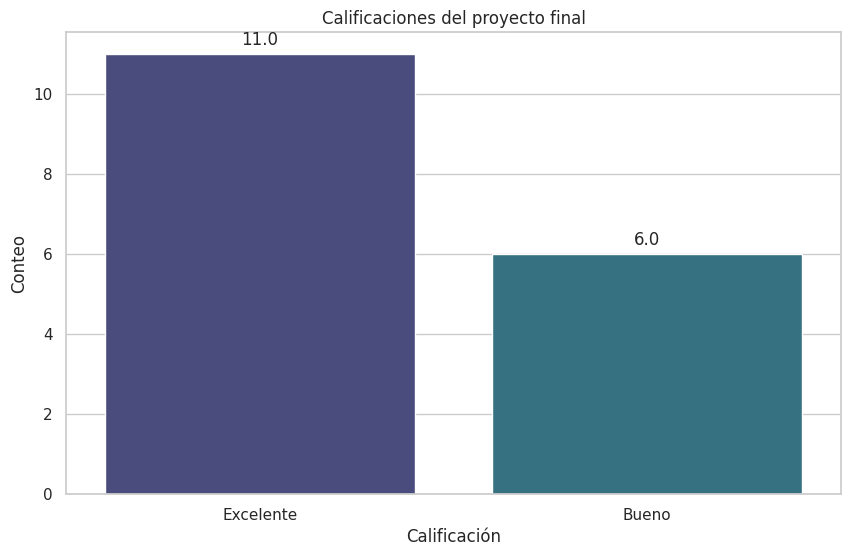

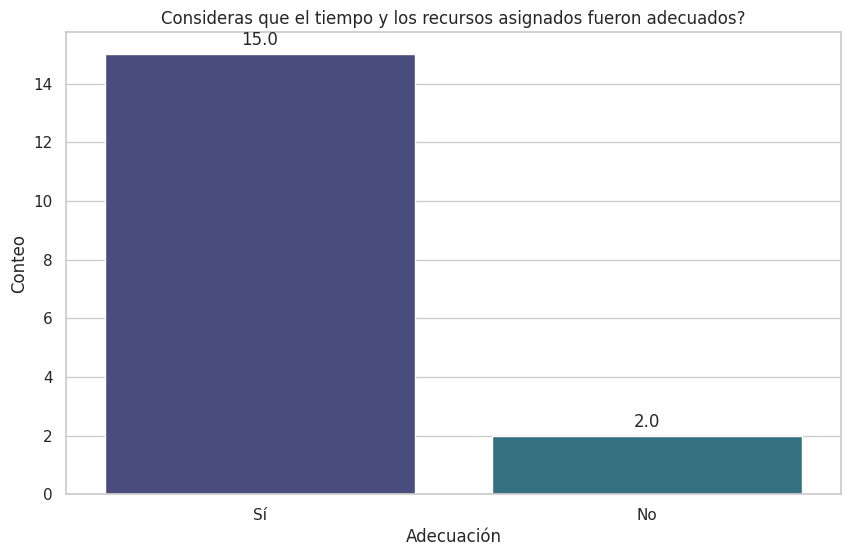

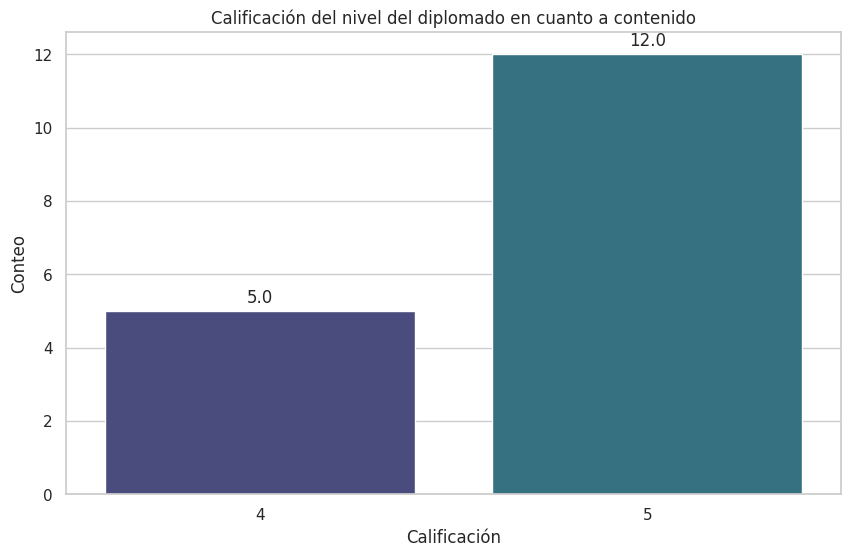

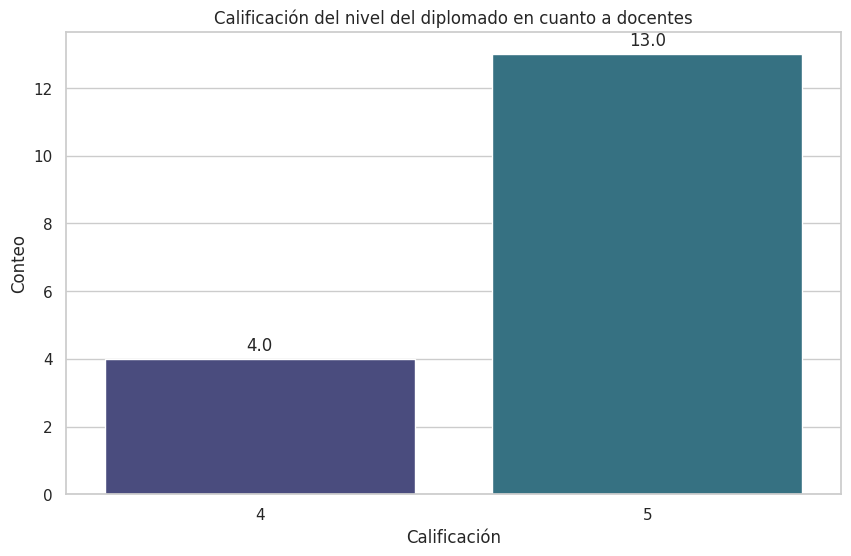

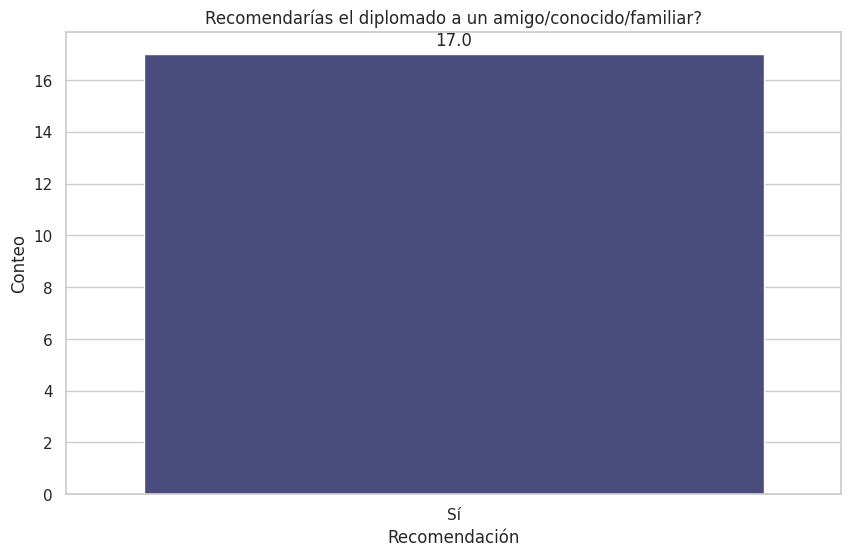

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Load the data
file_path = '/content/diplomadods.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Data preprocessing
module_columns = [
    'Calificación de módulo de Introducción a Python',
    'Calificación de módulo de Matemáticas y Estadística',
    'Calificación de módulo Análisis Exploratorio de Datos',
    'Calificación de módulo Machine Learning'
]

data['Proyecto Final'] = data['Calificación de experiencia desarrollo de Proyecto Final'].str.strip()
data['Recomendación'] = data['¿Recomendarías este diplomado a alguien conocido/pariente/amigo?'].str.strip()

# Renaming columns to remove trailing spaces
data.columns = [col.strip() for col in data.columns]

# Define colors and aesthetics
sns.set(style="whitegrid")
colors = sns.color_palette("viridis", 4)

# Function to add value labels
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Create plots
figures = []

# 1. Distribution of module grades
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=pd.melt(data[module_columns]), x='value', hue='variable', palette=colors, ax=ax)
add_value_labels(ax)
ax.set_title('Distribución de calificaciones por módulo')
ax.set_xlabel('Calificación')
ax.set_ylabel('Conteo')
figures.append(fig)

# 2. Project final grades
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=data, x='Proyecto Final', palette=colors, ax=ax)
add_value_labels(ax)
ax.set_title('Calificaciones del proyecto final')
ax.set_xlabel('Calificación')
ax.set_ylabel('Conteo')
figures.append(fig)

# 3. Evaluation of time and resources
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=data, x='¿Consideras que el tiempo y los recursos asignados fueron adecuados?', palette=colors, ax=ax)
add_value_labels(ax)
ax.set_title('Consideras que el tiempo y los recursos asignados fueron adecuados?')
ax.set_xlabel('Adecuación')
ax.set_ylabel('Conteo')
figures.append(fig)

# 4. Content level rating
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=data, x='De 1 a 5, ¿Cuánto calificas el nivel del diplomado en cuanto a contenido?', palette=colors, ax=ax)
add_value_labels(ax)
ax.set_title('Calificación del nivel del diplomado en cuanto a contenido')
ax.set_xlabel('Calificación')
ax.set_ylabel('Conteo')
figures.append(fig)

# 5. Teacher level rating
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=data, x='De 1 a 5, ¿Cuánto calificas el nivel del diplomado en cuanto a docentes?', palette=colors, ax=ax)
add_value_labels(ax)
ax.set_title('Calificación del nivel del diplomado en cuanto a docentes')
ax.set_xlabel('Calificación')
ax.set_ylabel('Conteo')
figures.append(fig)

# 6. Recommendation of the diploma
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=data, x='Recomendación', palette=colors, ax=ax)
add_value_labels(ax)
ax.set_title('Recomendarías el diplomado a un amigo/conocido/familiar?')
ax.set_xlabel('Recomendación')
ax.set_ylabel('Conteo')
figures.append(fig)

# Save plots to PDF
pdf_path = '/content/diplomado_analisis.pdf'
with PdfPages(pdf_path) as pdf:
    for fig in figures:
        pdf.savefig(fig, bbox_inches='tight')